In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
from pybaseball import pitching_stats, batting_stats

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC

In [2]:
#pitch_data = pitching_stats(2003,2019)
pitch_data = pd.read_csv(f'pitch_data_2003_2019.csv')

In [4]:
#pitch_data.to_csv(f'pitch_data_2003_2019.csv',index=False)

In [3]:
#hit_data = batting_stats(2004,2019)
hit_data = pd.read_csv(f'hit_data_2004_2019.csv')

In [7]:
#hit_data.to_csv(f'hit_data_2004_2019.csv',index=False)

In [4]:
# drop pi columns
hit_data.drop(list(hit_data.filter(regex='(pi)')),axis=1,inplace=True)
hit_data.drop(list(hit_data.filter(regex='(pfx)')),axis=1,inplace=True)

In [5]:
hit_data.drop(['IFFB','Pitches','Balls','Strikes','IFH','BUH',
               'FB% (Pitch)','FBv','SL%','SLv','CT%','CTv','CB%','CBv','CH%',
               'CHv','SF%','SFv','KN%','KNv','XX%'
              ],axis=1,inplace=True)

In [6]:
hit_data.drop(['wFB','wSL','wCT','wCB','wCH',
               'wSF','wKN','wFB/C','wSL/C','wCT/C','wCB/C','wCH/C','wSF/C','wKN/C',
               'Clutch','BUH%','TTO%'
              ],axis=1,inplace=True)

In [8]:
hit_data.describe()

,Season,Age,G,AB,PA,H,1B,2B,3B,HR,...,UBR,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
count,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,...,10045.000000,15336.000000,15336.000000,10045.000000,14457.000000,14457.000000,14457.000000,14457.000000,14457.000000,14457.000000
mean,2011.540363,28.120762,62.528560,173.322183,193.998957,44.750000,29.505934,8.937076,0.916927,5.390063,...,0.000996,-0.858777,0.506527,-0.000846,0.357256,0.353334,0.289507,0.220061,0.543769,0.236270
std,4.626507,4.131711,49.591794,199.258645,223.193895,55.740094,36.758000,11.669289,1.802403,8.670435,...,1.697350,9.960633,0.718121,0.953065,0.190337,0.190804,0.194841,0.190688,0.198738,0.161105
min,2004.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-10.600000,-39.900000,0.000000,-5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,25.000000,21.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,-0.600000,-5.300000,0.000000,-0.400000,0.286000,0.292000,0.209000,0.130000,0.476000,0.139000
50%,2012.000000,27.000000,44.000000,66.000000,75.000000,14.000000,10.000000,3.000000,0.000000,1.000000,...,0.000000,-1.200000,0.100000,0.000000,0.382000,0.341000,0.260000,0.181000,0.535000,0.253000
75%,2016.000000,31.000000,105.000000,317.250000,354.250000,80.000000,52.000000,16.000000,1.000000,8.000000,...,0.700000,0.200000,0.700000,0.500000,0.449000,0.394000,0.329000,0.250000,0.614000,0.329000
max,2019.000000,49.000000,163.000000,716.000000,778.000000,262.000000,225.000000,58.000000,23.000000,59.000000,...,8.300000,105.700000,4.100000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


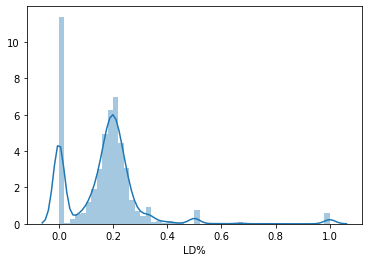

In [16]:
sns.distplot(hit_data['LD%'])

In [19]:
hit_data.columns

Index(['Season', 'Name', 'Team', 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B',
       'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB',
       'CS', 'AVG', 'GB', 'FB', 'LD', 'BU', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG',
       'OPS', 'ISO', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB',
       'IFH%', 'wOBA', 'wRAA', 'wRC', 'Bat', 'Fld', 'Rep', 'Pos', 'RAR', 'WAR',
       'Dol', 'Spd', 'wRC+', 'WPA', '-WPA', '+WPA', 'RE24', 'REW', 'pLI',
       'phLI', 'PH', 'WPA/LI', 'PO%', 'O-Swing%', 'Z-Swing%', 'Swing%',
       'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%',
       'BsR', 'Pace', 'Def', 'wSB', 'UBR', 'Age Rng', 'Off', 'Lg', 'wGDP',
       'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%'],
      dtype='object')

In [138]:
hit_data[hit_data['Name']=='Mike Trout'][['Season','Age','WAR']]

,Season,Age,WAR
2,2013.0,21.0,10.2
3,2012.0,20.0,10.1
5,2018.0,26.0,9.8
7,2016.0,24.0,9.7
11,2015.0,23.0,9.3
17,2019.0,27.0,8.6
29,2014.0,22.0,8.3
100,2017.0,25.0,6.8
3979,2011.0,19.0,0.7


In [139]:
hit_data[hit_data['Name']=='Chris Davis'][['Season','Age','WAR']]

,Season,Age,WAR
82,2013.0,27.0,7.1
261,2015.0,29.0,5.4
1262,2016.0,30.0,2.9
2248,2012.0,26.0,1.8
3579,2014.0,28.0,0.9
3638,2008.0,22.0,0.8
7158,2017.0,31.0,0.0
14079,2009.0,23.0,-0.5
14093,2011.0,25.0,-0.5
14692,2010.0,24.0,-0.7


In [9]:
hit_data_agg = batting_stats(2004, 2018, ind=0)

KeyboardInterrupt: 

In [64]:
#hit_data_agg.to_csv(f'hit_data_2004_2018_aggregated.csv',index=False)

In [10]:
hit_data_agg = pd.read_csv(f'hit_data_2004_2018_aggregated.csv')

In [11]:
# drop pi columns
hit_data_agg.drop(list(hit_data_agg.filter(regex='(pi)')),axis=1,inplace=True)
hit_data_agg.drop(list(hit_data_agg.filter(regex='(pfx)')),axis=1,inplace=True)
hit_data_agg.drop(['IFFB','Pitches','Balls','Strikes','IFH','BUH',
               'FB% (Pitch)','FBv','SL%','SLv','CT%','CTv','CB%','CBv','CH%',
               'CHv','SF%','SFv','KN%','KNv','XX%','wFB','wSL','wCT','wCB','wCH',
               'wSF','wKN','wFB/C','wSL/C','wCT/C','wCB/C','wCH/C','wSF/C','wKN/C',
               'Clutch','BUH%','TTO%'
              ],axis=1,inplace=True)

KeyError: "['IFFB' 'Pitches' 'Balls' 'Strikes' 'IFH' 'BUH' 'FB% (Pitch)' 'FBv' 'SL%'\n 'SLv' 'CT%' 'CTv' 'CB%' 'CBv' 'CH%' 'CHv' 'SF%' 'SFv' 'KN%' 'KNv' 'XX%'\n 'wFB' 'wSL' 'wCT' 'wCB' 'wCH' 'wSF' 'wKN' 'wFB/C' 'wSL/C' 'wCT/C' 'wCB/C'\n 'wCH/C' 'wSF/C' 'wKN/C' 'Clutch' 'BUH%' 'TTO%'] not found in axis"

In [12]:
#hit_data_agg['pull_hitter'] 
pd.cut(hit_data_agg['Pull%'], bins=[0,40, 200], labels=['no','yes'])

0       no
1       no
2       no
3       no
4       no
        ..
3697    no
3698    no
3699    no
3700    no
3701    no
Name: Pull%, Length: 3702, dtype: category
Categories (2, object): [no < yes]

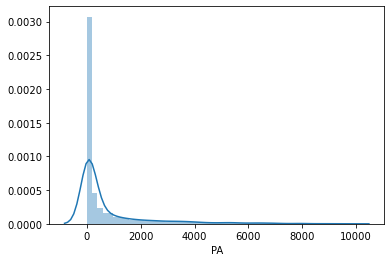

In [52]:
sns.distplot(hit_data_agg['PA'])

In [66]:
#hit_data_agg[(hit_data_agg['PA']>=500) & (hit_data_agg['PA']<750)]
hit_data_agg = hit_data_agg[hit_data_agg['PA'] >= 750]

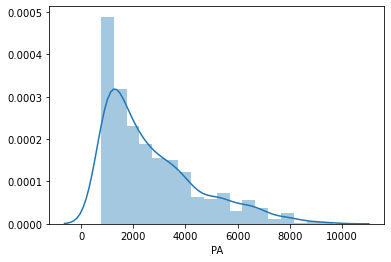

In [67]:
sns.distplot(hit_data_agg['PA'])

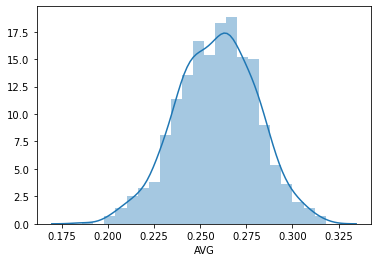

In [68]:
sns.distplot(hit_data_agg['AVG'])

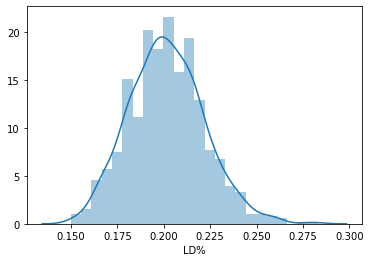

In [69]:
sns.distplot(hit_data_agg['LD%'])

In [87]:
hit_data_agg['driver'] = pd.cut(hit_data_agg['LD%'], bins=[0,.19, .4], labels=['no','yes'])

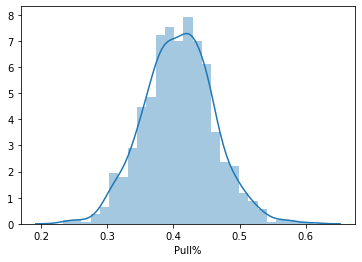

In [70]:
sns.distplot(hit_data_agg['Pull%'])

In [71]:
hit_data_agg['pull_hitter'] = pd.cut(hit_data_agg['Pull%'], bins=[0,40, 200], labels=['no','yes'])

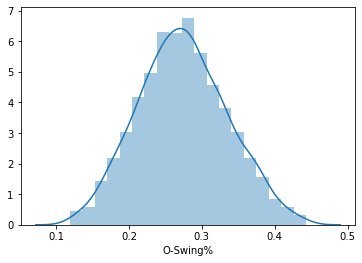

In [75]:
sns.distplot(hit_data_agg['O-Swing%'])

In [77]:
hit_data_agg['wild_swinger'] = pd.cut(hit_data_agg['O-Swing%'], bins=[0,.48, 1], labels=['no','yes'])

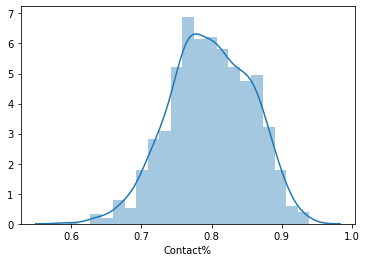

In [78]:
sns.distplot(hit_data_agg['Contact%'])

In [82]:
hit_data_agg['high_contact'] = pd.cut(hit_data_agg['Contact%'], bins=[0,.8, 1], labels=['no','yes'])

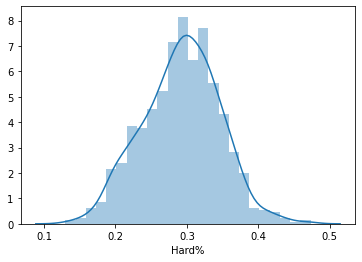

In [89]:
sns.distplot(hit_data_agg['Hard%'])

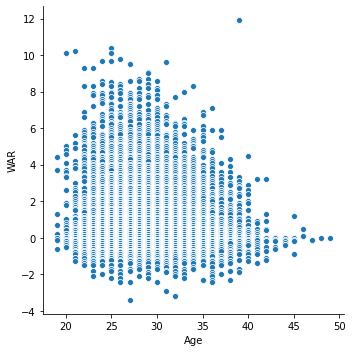

In [13]:
sns.relplot(x='Age',y='WAR',data=hit_data)

In [90]:
hit_data_agg['hard_hitter'] = pd.cut(hit_data_agg['Hard%'], bins=[0,.3, 1], labels=['no','yes'])

In [93]:
hit_data_agg[['Name','AVG','pull_hitter','wild_swinger','high_contact','driver','hard_hitter']]

,Name,AVG,pull_hitter,wild_swinger,high_contact,driver,hard_hitter
104,Miguel Cabrera,0.318,no,no,no,yes,yes
217,Adrian Beltre,0.295,no,no,yes,yes,yes
128,Albert Pujols,0.296,no,no,yes,no,yes
93,Mike Trout,0.307,no,no,yes,yes,yes
235,Chase Utley,0.276,no,no,yes,yes,yes
...,...,...,...,...,...,...,...
1206,Jordan Pacheco,0.272,no,no,yes,yes,no
1308,Gerald Laird,0.243,no,no,yes,no,no
1760,Rob Johnson,0.200,no,no,no,yes,no
1875,Koyie Hill,0.207,no,no,no,yes,no


In [94]:
hit_data_agg

,Name,Team,Age,G,AB,PA,H,1B,2B,3B,...,Cent%,Oppo%,Soft%,Med%,Hard%,pull_hitter,wild_swinger,high_contact,driver,hard_hitter
104,Miguel Cabrera,- - -,28.0,2177.0,8142.0,9341.0,2592.0,1590.0,535.0,14.0,...,0.328,0.283,0.111,0.490,0.399,no,no,no,yes,yes
217,Adrian Beltre,- - -,32.0,2123.0,8204.0,8969.0,2417.0,1527.0,492.0,20.0,...,0.345,0.249,0.143,0.506,0.351,no,no,yes,yes,yes
128,Albert Pujols,- - -,31.0,2217.0,8425.0,9650.0,2491.0,1462.0,501.0,9.0,...,0.338,0.191,0.146,0.484,0.371,no,no,yes,no,yes
93,Mike Trout,Angels,23.0,1065.0,3870.0,4673.0,1187.0,679.0,224.0,44.0,...,0.358,0.274,0.144,0.471,0.386,no,no,yes,yes,yes
235,Chase Utley,- - -,32.0,1894.0,6723.0,7711.0,1853.0,1138.0,401.0,57.0,...,0.333,0.214,0.143,0.501,0.356,no,no,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,Jordan Pacheco,- - -,28.0,377.0,1076.0,1149.0,293.0,217.0,62.0,4.0,...,0.373,0.249,0.171,0.588,0.241,no,no,yes,yes,no
1308,Gerald Laird,- - -,30.0,780.0,2408.0,2684.0,585.0,405.0,135.0,8.0,...,0.317,0.248,0.187,0.559,0.254,no,no,yes,no,no
1760,Rob Johnson,- - -,27.0,265.0,736.0,829.0,147.0,97.0,38.0,4.0,...,0.355,0.236,0.192,0.576,0.232,no,no,no,yes,no
1875,Koyie Hill,- - -,30.0,338.0,948.0,1046.0,196.0,141.0,43.0,4.0,...,0.331,0.213,0.171,0.567,0.262,no,no,no,yes,no


In [145]:
hit_data_trans = batting_stats(2004, 2006)

In [146]:
hit_data_trans.drop(list(hit_data_trans.filter(regex='(pi)')),axis=1,inplace=True)
hit_data_trans.drop(list(hit_data_trans.filter(regex='(pfx)')),axis=1,inplace=True)
hit_data_trans.drop(['IFFB','Pitches','Balls','Strikes','IFH','BUH',
               'FB% (Pitch)','FBv','SL%','SLv','CT%','CTv','CB%','CBv','CH%',
               'CHv','SF%','SFv','KN%','KNv','XX%','wFB','wSL','wCT','wCB','wCH',
               'wSF','wKN','wFB/C','wSL/C','wCT/C','wCB/C','wCH/C','wSF/C','wKN/C',
               'Clutch','BUH%','TTO%','GB','FB','LD','BU','OBP','SLG',
               'GB/FB','Bat','Rep','Pos','Dol','Spd','wRC+','WPA','-WPA',
               '+WPA','RE24','REW','pLI','phLI','PH','WPA/LI','PO%','BsR','Pace','Def',
               'wSB','UBR','Off','Lg','wGDP'
              ],axis=1,inplace=True)

In [156]:
hit_data_trans = hit_data_trans[hit_data_trans['PA'] >= 180]

In [147]:
hit_data_trans.columns

Index(['Season', 'Name', 'Team', 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B',
       'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB',
       'CS', 'AVG', 'BB%', 'K%', 'BB/K', 'OPS', 'ISO', 'BABIP', 'LD%', 'GB%',
       'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'wOBA', 'wRAA', 'wRC', 'Fld', 'RAR',
       'WAR', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%',
       'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'Age Rng', 'Pull%', 'Cent%',
       'Oppo%', 'Soft%', 'Med%', 'Hard%'],
      dtype='object')

In [157]:
hit_data_pivot = pd.pivot_table(hit_data_trans,index='Name',columns='Season')

In [158]:
hit_data_pivot = hit_data_pivot.sort_index(axis=1, level=1)

In [159]:
hit_data_pivot.columns = [f'{x}_{int(y)}' for x,y in hit_data_pivot.columns]

In [160]:
hit_data_pivot = hit_data_pivot.reset_index()
hit_data_pivot

,Name,1B_2004,2B_2004,3B_2004,AB_2004,AVG_2004,Age_2004,BABIP_2004,BB_2004,BB%_2004,...,Soft%_2006,SwStr%_2006,Swing%_2006,WAR_2006,Z-Contact%_2006,Z-Swing%_2006,Zone%_2006,wOBA_2006,wRAA_2006,wRC_2006
0,A.J. Pierzynski,87.0,28.0,2.0,471.0,0.272,27.0,0.268,19.0,0.037,...,0.125,0.106,0.605,2.0,0.889,0.826,0.497,0.330,-0.5,68.0
1,Aaron Boone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.135,0.097,0.495,-0.8,0.894,0.697,0.520,0.302,-9.8,39.0
2,Aaron Hill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.117,0.054,0.420,2.5,0.932,0.624,0.540,0.323,-4.6,71.0
3,Aaron Miles,129.0,15.0,3.0,522.0,0.293,27.0,0.313,29.0,0.051,...,0.134,0.042,0.431,-0.6,0.957,0.592,0.550,0.292,-16.0,43.0
4,Aaron Rowand,87.0,38.0,2.0,487.0,0.310,26.0,0.340,30.0,0.056,...,0.123,0.095,0.496,1.2,0.905,0.708,0.513,0.323,-3.3,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Wily Mo Pena,50.0,10.0,1.0,336.0,0.259,22.0,0.302,22.0,0.060,...,0.094,0.197,0.551,1.0,0.827,0.777,0.470,0.358,6.8,45.0
488,Xavier Nady,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.101,0.104,0.516,0.2,0.895,0.725,0.517,0.338,2.7,67.0
489,Yadier Molina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.119,0.066,0.507,-0.3,0.920,0.708,0.543,0.263,-27.0,31.0
490,Yorvit Torrealba,23.0,7.0,3.0,172.0,0.227,25.0,0.243,17.0,0.087,...,0.164,0.092,0.439,0.8,0.877,0.630,0.530,0.312,-4.1,26.0


In [103]:
#df = df.groupby('device_id')['p_food', 'p_phone'].apply(lambda x: pd.DataFrame(x.values)).unstack().reset_index()
#df.columns = df.columns.droplevel()
#df.columns = ['device_id','p_food_1', 'p_food_2', 'p_phone_1','p_phone_2']


hit_data_trans[hit_data_trans['Name']=='Mark DeRosa'].groupby(['Season','Name']).apply(lambda x: pd.DataFrame(x.values)).unstack(2).reset_index()

,Season,Name,0,1,2,3,4,5,6,7,...,79,80,81,82,83,84,85,86,87,88
,,,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2004.0,Mark DeRosa,2004,Mark DeRosa,Braves,29,118,309,345,74,...,29 - 29,-20.7,0.9,0.1,0.297,0.293,0.41,0.135,0.677,0.188
1,2005.0,Mark DeRosa,2005,Mark DeRosa,Rangers,30,66,148,166,36,...,30 - 30,-1.5,0.5,-0.9,0.407,0.363,0.23,0.133,0.549,0.319
2,2006.0,Mark DeRosa,2006,Mark DeRosa,Rangers,31,136,520,572,154,...,31 - 31,3.2,1.9,-0.4,0.405,0.369,0.226,0.098,0.605,0.298


In [161]:
for s in range(2007-3,2007):
    print(s)

2004
2005
2006


In [200]:
seasons = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

list_hit_data = []

for season in seasons:
    # get prev 3 season range
    begin_range = season - 3
    end_range = season - 1
    
    # get current season stats
    hit_data = batting_stats(season)
    
    # get previous seasons
    hit_data_trans = batting_stats(begin_range, end_range)
    
    # clean up gross columns in both df's
    hit_data.drop(list(hit_data.filter(regex='(pi)')),axis=1,inplace=True)
    hit_data.drop(list(hit_data.filter(regex='(pfx)')),axis=1,inplace=True)
    hit_data.drop(['IFFB','Pitches','Balls','Strikes','IFH','BUH',
                   'FB% (Pitch)','FBv','SL%','SLv','CT%','CTv','CB%','CBv','CH%',
                   'CHv','SF%','SFv','KN%','KNv','XX%','wFB','wSL','wCT','wCB','wCH',
                   'wSF','wKN','wFB/C','wSL/C','wCT/C','wCB/C','wCH/C','wSF/C','wKN/C',
                   'Clutch','BUH%','TTO%','GB','FB','LD','BU','OBP','SLG',
                   'GB/FB','Bat','Rep','Pos','Dol','Spd','wRC+','WPA','-WPA',
                   '+WPA','RE24','REW','pLI','phLI','PH','WPA/LI','PO%','BsR','Pace','Def',
                   'wSB','UBR','Off','Lg','wGDP'
                  ],axis=1,inplace=True)
        
    hit_data_trans.drop(list(hit_data_trans.filter(regex='(pi)')),axis=1,inplace=True)
    hit_data_trans.drop(list(hit_data_trans.filter(regex='(pfx)')),axis=1,inplace=True)
    hit_data_trans.drop(['IFFB','Pitches','Balls','Strikes','IFH','BUH',
                   'FB% (Pitch)','FBv','SL%','SLv','CT%','CTv','CB%','CBv','CH%',
                   'CHv','SF%','SFv','KN%','KNv','XX%','wFB','wSL','wCT','wCB','wCH',
                   'wSF','wKN','wFB/C','wSL/C','wCT/C','wCB/C','wCH/C','wSF/C','wKN/C',
                   'Clutch','BUH%','TTO%','GB','FB','LD','BU','OBP','SLG',
                   'GB/FB','Bat','Rep','Pos','Dol','Spd','wRC+','WPA','-WPA',
                   '+WPA','RE24','REW','pLI','phLI','PH','WPA/LI','PO%','BsR','Pace','Def',
                   'wSB','UBR','Off','Lg','wGDP'
                  ],axis=1,inplace=True)
    
    # filter out rows, this mostly hits pitchers and players w/o much playing time
    hit_data = hit_data[hit_data['PA'] >= 180]
    hit_data_trans = hit_data_trans[hit_data_trans['PA'] >= 180]

    
    # pivot the previous 3 years
    hit_data_pivot = pd.pivot_table(hit_data_trans,index='Name',columns='Season')
    hit_data_pivot = hit_data_pivot.sort_index(axis=1, level=1)
    hit_data_pivot.columns = [f'{x}_{season-int(y)}' for x,y in hit_data_pivot.columns]
    hit_data_pivot = hit_data_pivot.reset_index()
    
    # merge current season w/ previous 3 seasons
    merged = hit_data.merge(hit_data_pivot, how='left', on='Name')
    
    list_hit_data.append(merged)
    
    
all_hit = pd.concat(list_hit_data, ignore_index=True)
    

In [305]:
all_hit.to_csv(f'all_hit_data.csv',index=False)

In [2]:
all_hit = pd.read_csv(f'all_hit_data.csv')

In [15]:
all_hit['WAR']

0       9.6
1       8.4
2       8.0
3       7.9
4       7.7
       ... 
4793   -1.3
4794   -1.4
4795   -1.5
4796   -1.7
4797   -2.1
Name: WAR, Length: 4798, dtype: float64

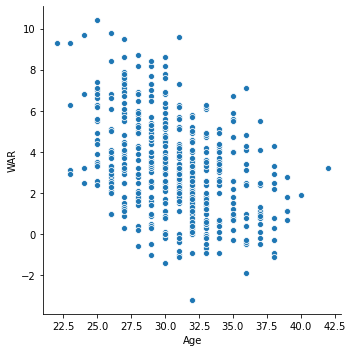

In [16]:
sns.relplot(x='Age',y='WAR',data=all_hit[all_hit['WAR_3']>4])

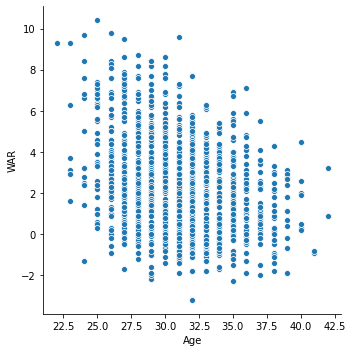

In [21]:
sns.relplot(x='Age',y='WAR',data=all_hit[all_hit['WAR_3']>2])

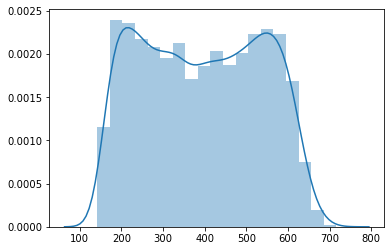

In [20]:
sns.distplot([all_hit['AB']])

In [201]:
for i,column in enumerate(all_hit.columns):
    print(i,column)

0 Season
1 Name
2 Team
3 Age
4 G
5 AB
6 PA
7 H
8 1B
9 2B
10 3B
11 HR
12 R
13 RBI
14 BB
15 IBB
16 SO
17 HBP
18 SF
19 SH
20 GDP
21 SB
22 CS
23 AVG
24 BB%
25 K%
26 BB/K
27 OPS
28 ISO
29 BABIP
30 LD%
31 GB%
32 FB%
33 IFFB%
34 HR/FB
35 IFH%
36 wOBA
37 wRAA
38 wRC
39 Fld
40 RAR
41 WAR
42 O-Swing%
43 Z-Swing%
44 Swing%
45 O-Contact%
46 Z-Contact%
47 Contact%
48 Zone%
49 F-Strike%
50 SwStr%
51 Age Rng
52 Pull%
53 Cent%
54 Oppo%
55 Soft%
56 Med%
57 Hard%
58 1B_3
59 2B_3
60 3B_3
61 AB_3
62 AVG_3
63 Age_3
64 BABIP_3
65 BB_3
66 BB%_3
67 BB/K_3
68 CS_3
69 Cent%_3
70 Contact%_3
71 F-Strike%_3
72 FB%_3
73 Fld_3
74 G_3
75 GB%_3
76 GDP_3
77 H_3
78 HBP_3
79 HR_3
80 HR/FB_3
81 Hard%_3
82 IBB_3
83 IFFB%_3
84 IFH%_3
85 ISO_3
86 K%_3
87 LD%_3
88 Med%_3
89 O-Contact%_3
90 O-Swing%_3
91 OPS_3
92 Oppo%_3
93 PA_3
94 Pull%_3
95 R_3
96 RAR_3
97 RBI_3
98 SB_3
99 SF_3
100 SH_3
101 SO_3
102 Soft%_3
103 SwStr%_3
104 Swing%_3
105 WAR_3
106 Z-Contact%_3
107 Z-Swing%_3
108 Zone%_3
109 wOBA_3
110 wRAA_3
111 wRC_3
112 1B_

In [141]:
all_hit

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,...,Soft%_1,SwStr%_1,Swing%_1,WAR_1,Z-Contact%_1,Z-Swing%_1,Zone%_1,wOBA_1,wRAA_1,wRC_1
0,2007.0,Alex Rodriguez,Yankees,31.0,158.0,583.0,708.0,183.0,98.0,31.0,...,0.089,0.110,0.434,3.8,0.819,0.677,0.481,0.389,33.3,118.0
1,2007.0,David Wright,Mets,24.0,160.0,604.0,711.0,196.0,123.0,42.0,...,0.073,0.069,0.443,4.7,0.902,0.666,0.534,0.382,28.7,112.0
2,2007.0,Magglio Ordonez,Tigers,33.0,157.0,595.0,679.0,216.0,134.0,54.0,...,0.090,0.081,0.515,1.2,0.907,0.775,0.523,0.355,12.7,94.0
3,2007.0,Curtis Granderson,Tigers,26.0,158.0,612.0,676.0,185.0,101.0,38.0,...,0.094,0.123,0.425,4.0,0.810,0.632,0.512,0.335,1.9,87.0
4,2007.0,Albert Pujols,Cardinals,27.0,158.0,565.0,679.0,185.0,114.0,38.0,...,0.078,0.055,0.417,8.1,0.926,0.651,0.491,0.447,62.6,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,2019.0,Chris Davis,Orioles,33.0,105.0,307.0,352.0,55.0,34.0,9.0,...,0.131,0.142,0.451,-3.2,0.783,0.650,0.432,0.239,-32.3,29.0
4794,2019.0,Curtis Granderson,Marlins,38.0,138.0,317.0,363.0,58.0,28.0,17.0,...,0.155,0.099,0.389,0.9,0.836,0.589,0.420,0.341,8.8,56.0
4795,2019.0,Elias Diaz,Pirates,28.0,101.0,303.0,332.0,73.0,57.0,14.0,...,0.195,0.095,0.465,1.8,0.899,0.692,0.429,0.340,5.7,38.0
4796,2019.0,Lewis Brinson,Marlins,25.0,75.0,226.0,248.0,39.0,29.0,9.0,...,0.189,0.172,0.529,-1.0,0.764,0.723,0.441,0.248,-22.1,25.0


In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import make_pipeline

In [4]:
# build train and test sets
#model_data = all_hit.filter(regex='(^Age$)|(^AVG$)|(^Season$)|(_\d$)', axis=1)
model_data = all_hit.filter(regex='(^Age$)|(^WAR$)|(^Season$)|(_\d$)', axis=1)

In [8]:
model_data[['WAR','WAR_3','WAR_2','WAR_1']].describe()

,WAR,WAR_3,WAR_2,WAR_1
count,4798.000000,2748.000000,3189.000000,3712.000000
mean,1.597124,2.293013,2.153669,1.979445
std,1.929800,2.035825,1.966809,1.939724
min,-3.400000,-3.400000,-3.400000,-3.400000
25%,0.200000,0.800000,0.700000,0.600000
50%,1.200000,2.000000,1.900000,1.700000
75%,2.600000,3.500000,3.300000,3.000000
max,10.400000,11.900000,10.200000,10.400000


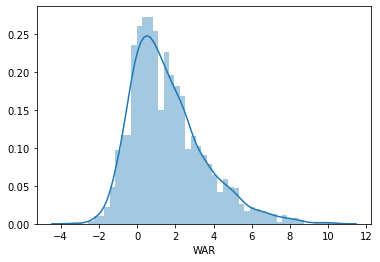

In [27]:
sns.distplot(model_data['WAR'])

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [24]:
#model_data[model_data['Season']<2019].drop(['Season','AVG'],axis=1)
model_data[model_data['Season']<2019]['WAR']

0       9.6
1       8.4
2       8.0
3       7.9
4       7.7
       ... 
4412   -1.1
4413   -1.3
4414   -1.3
4415   -1.7
4416   -3.2
Name: WAR, Length: 4417, dtype: float64

In [10]:
# Get season data, drop season and target variable AVG
#X_train = model_data[model_data['Season']<2019].drop(['Season','WAR'],axis=1)
X_train = model_data[model_data['Season']<2019][['Age','AB_3','AVG_3','BABIP_3','BB%_3','BB/K_3','Contact%_3','FB%_3','G_3',
'GB%_3','GDP_3','H_3','HBP_3','HR_3','HR/FB_3','Hard%_3','IFFB%_3','ISO_3',
'K%_3','LD%_3','OPS_3','PA_3','R_3','RAR_3','RBI_3','SB_3','SF_3','SH_3',
'SO_3','WAR_3','wOBA_3','wRAA_3','wRC_3','AB_2','AVG_2','BABIP_2','BB%_2',
'BB/K_2','Contact%_2','FB%_2','G_2','GB%_2','GDP_2','H_2','HBP_2','HR_2',
'HR/FB_2','Hard%_2','IFFB%_2','ISO_2','K%_2','LD%_2','OPS_2','PA_2','R_2',
'RAR_2','RBI_2','SB_2','SF_2','SH_2','SO_2','WAR_2','wOBA_2','wRAA_2','wRC_2',
'AB_1','AVG_1','BABIP_1','BB%_1','BB/K_1','Contact%_1','FB%_1','G_1','GB%_1',
'GDP_1','H_1','HBP_1','HR_1','HR/FB_1','Hard%_1','IFFB%_1','ISO_1','K%_1',
'LD%_1','OPS_1','PA_1','R_1','RAR_1','RBI_1','SB_1','SF_1','SH_1','SO_1',
'WAR_1','wOBA_1','wRAA_1','wRC_1']]
#X_test = model_data[model_data['Season']==2019].drop(['Season','WAR'],axis=1)
X_test = model_data[model_data['Season']==2019][['Age','AB_3','AVG_3','BABIP_3','BB%_3','BB/K_3','Contact%_3','FB%_3','G_3',
'GB%_3','GDP_3','H_3','HBP_3','HR_3','HR/FB_3','Hard%_3','IFFB%_3','ISO_3',
'K%_3','LD%_3','OPS_3','PA_3','R_3','RAR_3','RBI_3','SB_3','SF_3','SH_3',
'SO_3','WAR_3','wOBA_3','wRAA_3','wRC_3','AB_2','AVG_2','BABIP_2','BB%_2',
'BB/K_2','Contact%_2','FB%_2','G_2','GB%_2','GDP_2','H_2','HBP_2','HR_2',
'HR/FB_2','Hard%_2','IFFB%_2','ISO_2','K%_2','LD%_2','OPS_2','PA_2','R_2',
'RAR_2','RBI_2','SB_2','SF_2','SH_2','SO_2','WAR_2','wOBA_2','wRAA_2','wRC_2',
'AB_1','AVG_1','BABIP_1','BB%_1','BB/K_1','Contact%_1','FB%_1','G_1','GB%_1',
'GDP_1','H_1','HBP_1','HR_1','HR/FB_1','Hard%_1','IFFB%_1','ISO_1','K%_1',
'LD%_1','OPS_1','PA_1','R_1','RAR_1','RBI_1','SB_1','SF_1','SH_1','SO_1',
'WAR_1','wOBA_1','wRAA_1','wRC_1']]


# grab target variable
Y_train = model_data[model_data['Season']<2019]['WAR']
Y_test = model_data[model_data['Season']==2019]['WAR']



In [11]:
test = SelectKBest(score_func=f_classif, k=10)

In [17]:
fit = test.fit(X_train_imputed, Y_train)

In [18]:
print(fit.scores_)

[ 1.37295342  2.04941817  2.32437393  1.86542581  1.68472084  1.7107487
  1.02475942  1.04968329  1.61645531  0.95260431  1.68292498  2.63923509
  1.26115992  2.87006261  1.85088456  1.70096973  1.48222098  2.24890574
  1.17034243  1.32894765  3.20487608  2.17138139  3.44228788  5.83850283
  2.72076641  2.35378314  1.71825375  0.84395205  2.10729566  6.3294895
  3.11520131  4.15451911  3.76325041  2.07807831  2.72162114  1.85267526
  2.05030582  2.10073781  0.95103034  0.88523816  1.28503512  0.86408442
  1.71107028  2.93528378  1.73900419  3.34399182  1.77087453  2.08537867
  1.11745474  2.22920137  1.18103857  0.90626211  3.79559208  2.3220037
  4.26344303  8.3240874   3.41927839  2.73067213  2.33484026  0.88033984
  1.99231756  9.02922183  3.77995226  5.2795137   4.74173529  4.21663446
  3.61942117  1.93214077  2.14825389  2.58471998  0.90639675  0.9140257
  2.724867    0.92465739  2.51302018  5.47918462  2.41332466  5.14249863
  2.23445548  2.74219781  1.19374     3.27213271  1.404

In [20]:
features = fit.transform(X_train_imputed)

In [22]:
features

array([[ 67.7,   6.6,  90.5, ...,   3.8,  33.3, 118. ],
       [ 23.7,   2.3,  57.5, ...,   4.7,  28.7, 112. ],
       [  5.8,   0.6,  12.4, ...,   1.2,  12.7,  94. ],
       ...,
       [ 19.2,   1. ,  18.3, ...,   1.1,  -4. ,  19. ],
       [-18.6,  -2. ,  10.7, ...,  -1.1,  -6.6,  46. ],
       [ 51.2,   5.4,  28.3, ...,   0. ,  -3.9,  60. ]])

In [26]:
cols = fit.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
features_df_new.describe()

,RAR_3,WAR_3,RAR_2,WAR_2,OPS_1,R_1,RAR_1,WAR_1,wRAA_1,wRC_1
count,2549.000000,4417.000000,2952.000000,4417.000000,3432.000000,3432.000000,3432.000000,4417.000000,3432.000000,3432.000000
mean,22.369969,1.743491,20.927846,1.768859,0.762582,59.082459,19.323864,1.764388,5.933625,61.792832
std,19.948966,1.672853,19.260814,1.704588,0.096605,25.037062,18.929610,1.760453,15.307454,28.446495
min,-33.700000,-3.400000,-33.700000,-3.400000,0.382000,6.000000,-33.700000,-3.400000,-33.600000,-1.000000
25%,7.700000,1.000000,6.900000,1.000000,0.698000,39.000000,5.600000,0.900000,-4.500000,39.000000
50%,19.200000,1.000000,18.300000,1.000000,0.757000,57.000000,16.200000,1.000000,3.400000,59.000000
75%,33.900000,2.300000,31.900000,2.500000,0.822250,78.000000,29.900000,2.600000,13.725000,82.000000
max,122.100000,11.900000,98.200000,10.200000,1.114000,143.000000,98.200000,10.200000,77.300000,155.000000


In [103]:
print(len(X_train),len(Y_train))

4417 4417


In [142]:
X_train

,Age,AB_3,AVG_3,BABIP_3,BB%_3,BB/K_3,Contact%_3,FB%_3,G_3,GB%_3,...,RAR_1,RBI_1,SB_1,SF_1,SH_1,SO_1,WAR_1,wOBA_1,wRAA_1,wRC_1
0,31.0,601.0,0.286,0.308,0.115,0.61,0.746,0.389,155.0,0.456,...,39.6,121.0,15.0,4.0,0.0,139.0,3.8,0.389,33.3,118.0
1,24.0,263.0,0.293,0.297,0.049,0.35,0.851,0.425,69.0,0.336,...,48.6,116.0,20.0,8.0,0.0,113.0,4.7,0.382,28.7,112.0
2,33.0,202.0,0.292,0.291,0.072,0.73,0.853,0.331,52.0,0.486,...,12.8,104.0,1.0,4.0,0.0,87.0,1.2,0.355,12.7,94.0
3,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.5,68.0,8.0,6.0,7.0,174.0,4.0,0.335,1.9,87.0
4,27.0,592.0,0.331,0.298,0.121,1.62,0.871,0.403,154.0,0.416,...,84.1,137.0,7.0,3.0,0.0,50.0,8.1,0.447,62.6,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,32.0,596.0,0.250,0.308,0.122,0.55,0.802,0.364,156.0,0.433,...,26.2,64.0,7.0,4.0,0.0,101.0,2.6,0.358,15.2,75.0
4413,30.0,526.0,0.270,0.279,0.060,0.61,0.882,0.371,152.0,0.436,...,8.3,64.0,3.0,4.0,0.0,61.0,0.8,0.311,-4.2,58.0
4414,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,29.0,2.0,4.0,2.0,35.0,1.1,0.296,-4.0,19.0
4415,39.0,440.0,0.245,0.253,0.064,0.60,0.874,0.387,120.0,0.403,...,-10.8,47.0,0.0,2.0,0.0,63.0,-1.1,0.303,-6.6,46.0


In [13]:
#X_train['WAR_1'].fillna(X_train['WAR_1'].median()+2,inplace=True)
#X_train['WAR_2'].fillna(X_train['WAR_2'].median()+2,inplace=True)
#X_train['WAR_3'].fillna(X_train['WAR_3'].median()+2,inplace=True)

X_train['WAR_1'].fillna(1,inplace=True)
X_train['WAR_2'].fillna(1,inplace=True)
X_train['WAR_3'].fillna(1,inplace=True)

In [414]:
# fill w/ medina
X_train.fillna(X_train.median(),inplace=True)
X_test.fillna(X_train.median(),inplace=True)

In [415]:
X_train['WAR_3'].median()

1.0

In [416]:
X_train.loc[3,['WAR_3','WAR_2','WAR_1']]

WAR_3    1.0
WAR_2    1.0
WAR_1    4.0
Name: 3, dtype: float64

In [425]:
all_hit.loc[2,['Season','Name','WAR','WAR_3','WAR_2','WAR_1']]
#all_hit.loc[3,['Season','WAR','WAR_3','WAR_2','WAR_1']]

Season               2007
Name      Magglio Ordonez
WAR                     8
WAR_3                 0.6
WAR_2                 1.2
WAR_1                 1.2
Name: 2, dtype: object

In [424]:
Y_train.loc[2]

8.0

In [140]:
X_train

,Age,AB_3,AVG_3,BABIP_3,BB%_3,BB/K_3,Contact%_3,FB%_3,G_3,GB%_3,...,RAR_1,RBI_1,SB_1,SF_1,SH_1,SO_1,WAR_1,wOBA_1,wRAA_1,wRC_1
0,31.0,601.0,0.286,0.308,0.115,0.61,0.746,0.389,155.0,0.456,...,39.6,121.0,15.0,4.0,0.0,139.0,3.8,0.389,33.3,118.0
1,24.0,263.0,0.293,0.297,0.049,0.35,0.851,0.425,69.0,0.336,...,48.6,116.0,20.0,8.0,0.0,113.0,4.7,0.382,28.7,112.0
2,33.0,202.0,0.292,0.291,0.072,0.73,0.853,0.331,52.0,0.486,...,12.8,104.0,1.0,4.0,0.0,87.0,1.2,0.355,12.7,94.0
3,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.5,68.0,8.0,6.0,7.0,174.0,4.0,0.335,1.9,87.0
4,27.0,592.0,0.331,0.298,0.121,1.62,0.871,0.403,154.0,0.416,...,84.1,137.0,7.0,3.0,0.0,50.0,8.1,0.447,62.6,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,32.0,596.0,0.250,0.308,0.122,0.55,0.802,0.364,156.0,0.433,...,26.2,64.0,7.0,4.0,0.0,101.0,2.6,0.358,15.2,75.0
4413,30.0,526.0,0.270,0.279,0.060,0.61,0.882,0.371,152.0,0.436,...,8.3,64.0,3.0,4.0,0.0,61.0,0.8,0.311,-4.2,58.0
4414,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,29.0,2.0,4.0,2.0,35.0,1.1,0.296,-4.0,19.0
4415,39.0,440.0,0.245,0.253,0.064,0.60,0.874,0.387,120.0,0.403,...,-10.8,47.0,0.0,2.0,0.0,63.0,-1.1,0.303,-6.6,46.0


## Grid search... these parameters take long time

In [466]:
X_train['WAR_1'].fillna(1,inplace=True)
X_train['WAR_2'].fillna(1,inplace=True)
X_train['WAR_3'].fillna(1,inplace=True)

pipe = Pipeline([('impute', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler()),
                 ('svr',SVR())
                ])

In [467]:
params = {'svr__C': [0.1, 1, 10],
          'svr__kernel': ['linear','rbf'],
          'svr__epsilon': [0.001, 0.01, 0.1]
         }

In [468]:
grid = GridSearchCV(pipe,
                       param_grid=params,
                       scoring={'r2': make_scorer(r2_score)},
                       n_jobs=-1,
                       cv=5,
                       refit='r2')

In [469]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('impute',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__epsilon': [0.001, 0.01, 0.1],
                         'svr__kernel': ['linear', 'rbf']},
             refit='r2', scoring={'r2': make_scorer(r2_score)})

In [470]:
grid.best_params_

{'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}

In [471]:
grid.best_score_

0.2635061026930723

In [104]:
svr_model = Pipeline([('impute', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler()),
                 ('svr',SVR(C=0.1,epsilon=0.1,kernel='linear'))
                ])

In [124]:
Y_train.values.reshape(-1,1)

array([[ 9.6],
       [ 8.4],
       [ 8. ],
       ...,
       [-1.3],
       [-1.7],
       [-3.2]])

In [125]:
from sklearn.preprocessing import MinMaxScaler
# create target scaler object
target_scaler = MinMaxScaler()
target_scaler.fit(Y_train.values.reshape(-1,1))

train_y = target_scaler.transform(Y_train.values.reshape(-1,1))
#test_y = target_scaler.transform(test_y)

In [110]:
Y_train

0       9.6
1       8.4
2       8.0
3       7.9
4       7.7
       ... 
4412   -1.1
4413   -1.3
4414   -1.3
4415   -1.7
4416   -3.2
Name: WAR, Length: 4417, dtype: float64

In [127]:
train_y.ravel()

array([0.94202899, 0.85507246, 0.82608696, ..., 0.15217391, 0.12318841,
       0.01449275])

In [128]:
#svr_model.fit(X_train,Y_train)
svr_model.fit(X_train,train_y.ravel())


Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('svr', SVR(C=0.1, kernel='linear'))])

In [129]:
y_pred = svr_model.predict(X_train)

In [131]:
r2_score(train_y,y_pred)

0.3369252634036628

In [33]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_train,y_pred)

0.32690388202392795

In [76]:
from sklearn import linear_model
baymod = linear_model.BayesianRidge()

In [16]:
X_train['WAR_1'].fillna(1,inplace=True)
X_train['WAR_2'].fillna(1,inplace=True)
X_train['WAR_3'].fillna(1,inplace=True)
impute = SimpleImputer(strategy='median')
X_train_imputed = impute.fit_transform(X_train)

In [79]:
baymod.fit(X_train_imputed,Y_train)

BayesianRidge()

In [81]:
bay_y_pred = baymod.predict(X_train_imputed)

In [82]:
r2_score(Y_train,bay_y_pred)

0.31518158996619605

In [499]:
from sklearn.neural_network import MLPRegressor
X_train['WAR_1'].fillna(1,inplace=True)
X_train['WAR_2'].fillna(1,inplace=True)
X_train['WAR_3'].fillna(1,inplace=True)
impute = SimpleImputer(strategy='median')
X_train_imputed = impute.fit_transform(X_train)
regr = MLPRegressor(random_state=1, max_iter=50000)

In [500]:
regr.fit(X_train_imputed, Y_train)

MLPRegressor(max_iter=50000, random_state=1)

In [503]:
nnreg_pred = regr.predict(X_train_imputed)

In [504]:
r2_score(Y_train,nnreg_pred)

0.02126323930400764

In [461]:
len(X_test)

381

In [91]:
Y_train[pd.Series(Y_train-y_pred).abs() > 4]

0       9.6
1       8.4
2       8.0
3       7.9
6       6.9
       ... 
4046    8.0
4048    7.6
4050    6.6
4059    5.2
4416   -3.2
Name: WAR, Length: 82, dtype: float64

In [50]:
y_train_filtered = Y_train[pd.Series(Y_train-y_pred).abs() <= 4]

In [51]:
y_pred_filtered = y_pred[pd.Series(Y_train-y_pred).abs() <= 4]

In [46]:
len(Y_train)

4417

In [52]:
len(y_train_filtered)

4335

In [53]:
r2_score(y_train_filtered,y_pred_filtered)

0.3579003715834913

In [69]:
all_hit[all_hit['Name']=='Chris Davis']['WAR']

579     0.8
1058   -0.5
1782   -0.5
1976    1.8
2208    7.1
2780    0.9
2953    5.4
3382    2.9
3971    0.0
4416   -3.2
4793   -1.3
Name: WAR, dtype: float64

In [71]:
test_preds = svr_model.predict(X_test)

In [87]:
r2_score(Y_test,test_preds)

0.3249783305218431

In [85]:
X_test['WAR_1'].fillna(1,inplace=True)
X_test['WAR_2'].fillna(1,inplace=True)
X_test['WAR_3'].fillna(1,inplace=True)
imputeTest = SimpleImputer(strategy='median')
X_test_imputed = imputeTest.fit_transform(X_test)

bay_ytest_pred = baymod.predict(X_test_imputed)

In [86]:
r2_score(Y_test,bay_ytest_pred)

0.3378660479116157

In [89]:
pd.Series(Y_test-bay_ytest_pred).abs() > 4

4417    False
4418    False
4419    False
4420     True
4421     True
        ...  
4793    False
4794    False
4795    False
4796    False
4797    False
Name: WAR, Length: 381, dtype: bool

In [135]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, -1.5, 2, 8]
r2_score(y_true, y_pred)

0.9229122055674518

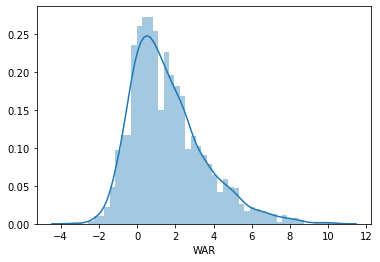

In [136]:
sns.distplot(all_hit['WAR'])